In [5]:
from keras.applications.inception_v3 import InceptionV3 as incep

In [101]:
from pathlib import Path
DATA_DIR = Path.cwd().parent.resolve() / 'Tick_Tick_Bloom\\tmp'
print(DATA_DIR)
assert DATA_DIR.exists()

C:\Users\Raja Babu\Desktop\Deep Learning\Project\Tick_Tick_Bloom\tmp


In [143]:
import keras
import tensorflow as tf
import numpy as np
class Parrot:
    def __init__(self,epochs=10):
        i=keras.layers.Input([None,None,3])
        self.epochs=epochs
        x= tf.cast(i,tf.float32)
        x=keras.layers.Rescaling(1./255)(x)
        x = keras.layers.Conv2D(filters=3,filters=(5,5),strides=5)(x)
        x = keras.layers.BatchNormalization(axis=3,scale=False)(x)
        x = keras.layers.Activation('relu')(x)
        x = keras.layers.Conv2D(filters=3,filters=(5,5),strides=5)(x)
        x = keras.layers.BatchNormalization(axis=3,scale=False)(x)
        x = keras.layers.Activation('relu')(x)
        x = keras.layers.Conv2D(filters=3,filters=(5,5),strides=5)(x)
        x = keras.layers.BatchNormalization(axis=3,scale=False)(x)
        x = keras.layers.Activation('relu')(x)

        x = keras.applications.inception_v3.preprocess_input(x)
        base_model = incep(include_top=True,weights="imagenet")
        self.shape = base_model.input.shape
        # print(self.shape)
        x = base_model(x,training  = False)
        # x = keras.layers.Flatten()(x)
        x = keras.layers.Dense(units=4,activation ="sigmoid")(x)
        self.model = keras.Model(inputs= [i],outputs=[x])
        pathtomodel = DATA_DIR/'model.h5'
        if pathtomodel.exists() : 
            self.model.load_weights(DATA_DIR/'model.h5')
            print('Model loaded from previous state')
        model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=DATA_DIR/'model.h5',
                                    save_weights_only=True,
                                    monitor= 'loss',
                                    verbose = 1,
                                    mode = 'min',
                                    save_best_only=True)
        reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                    factor = 0.2,
                                    patience = 5,
                                    min_lr = 0.0001)
        self.callbacks = [reduce_lr,model_checkpoint_callback]
        self.model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),optimizer = 'adam')
        # print(self.model.summary())


    def train(self,data,y):
        image ,label = data,y
        y = keras.utils.to_categorical(y,num_classes=4)
        self.model.fit(image,label,epochs = self.epochs,callbacks=self.callbacks)
    


In [144]:
import numpy as np
p = Parrot()
x = np.random.randint(0,255,size = (100,299,299,3))
# print(x)
y = np.random.randint(0,3,size=(100,1))
# print(np.unique(y))
# print(y,type(y))
p.train(x,y)

Model loaded from previous state
Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 1.3508
Epoch 1: loss improved from inf to 1.35083, saving model to C:\Users\Raja Babu\Desktop\Deep Learning\Project\Tick_Tick_Bloom\tmp\model.h5
4/4 [==============================] - 25s 4s/step - loss: 1.3508 - lr: 0.0010
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 1.3476
Epoch 2: loss improved from 1.35083 to 1.34760, saving model to C:\Users\Raja Babu\Desktop\Deep Learning\Project\Tick_Tick_Bloom\tmp\model.h5
4/4 [==============================] - 18s 4s/step - loss: 1.3476 - lr: 0.0010
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 1.3446
Epoch 3: loss improved from 1.34760 to 1.34463, saving model to C:\Users\Raja Babu\Desktop\Deep Learning\Project\Tick_Tick_Bloom\tmp\model.h5
4/4 [==============================] - 18s 4s/step - loss: 1.3446 - lr: 0.0010
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 1.3420
Epoch 4: loss im

['1', '0', '0', '1', '0', '1', '0', '2', '1', '2', '0', '0', '1', '1', '1', '1', '0', '2', '0', '1', '1', '0', '0', '0', '1', '0', '2', '1', '0', '2', '2', '2', '2', '0', '1', '0', '2', '2', '2', '2', '1', '2', '1', '2', '1', '2', '0', '1', '0', '0', '0', '1', '0', '0', '1', '2', '2', '2', '2', '1', '1', '0', '2', '2', '0', '0', '1', '0', '2', '2', '0', '2', '1', '1', '1', '1', '0', '1', '0', '2', '1', '0', '1', '1', '0', '2', '2', '2', '1', '2', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0'] <class 'list'>


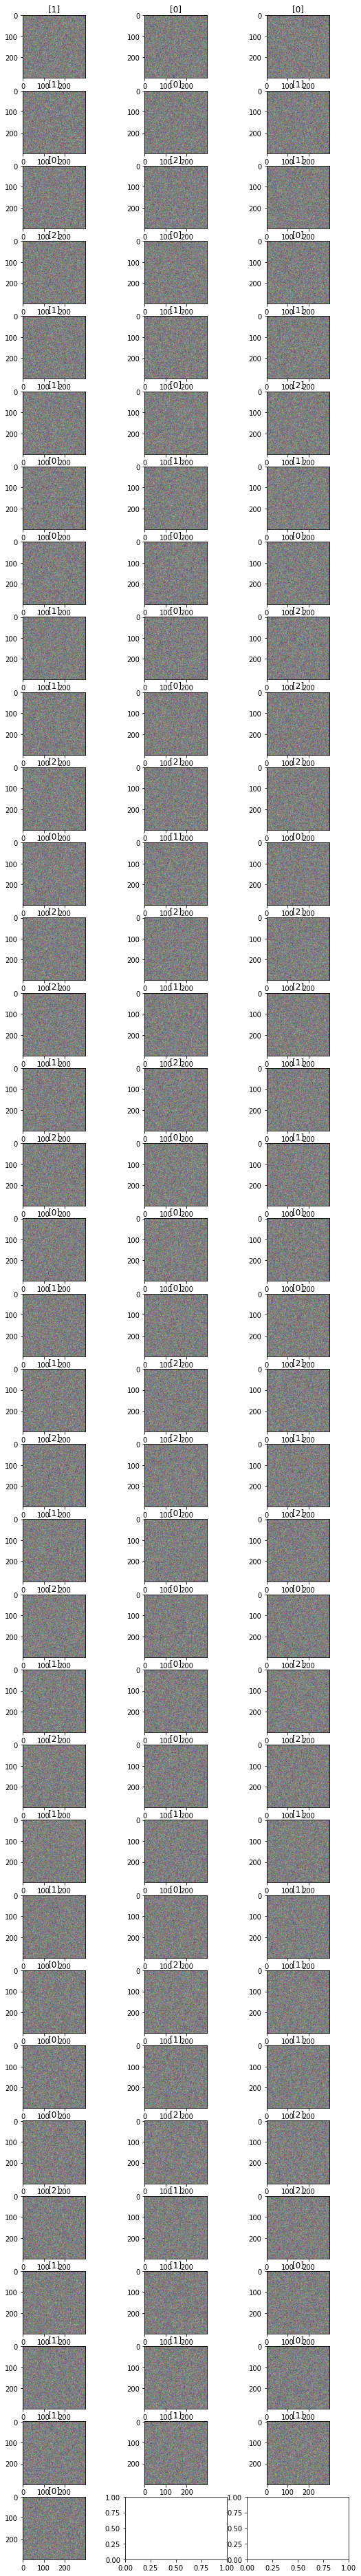

In [138]:
import matplotlib.pyplot as plt
import numpy as np

def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()
titles=[str(n[0]) for n in y]
print(titles,type(titles))

def plot_image_grid(images, ncols=None, cmap='gray',tts=None):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    for img,tt, ax in zip(imgs,tts, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.imshow(img)
            ax.set_title(str(tt))
            # ax.grid(True)
plot_image_grid(x,ncols=3,tts=y)

